<a href="https://colab.research.google.com/github/dovahkiin0022/dummy_group_repositiory/blob/data-visualization/group_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df_train = pd.read_csv('/content/hw5-iron-alloy.csv')

In [ ]:
df_train.columns

Index(['Names', 'Elastic (Young's, Tensile) Modulus', 'Elongation at Break',
       'Poisson's Ratio', 'Shear Modulus', 'Tensile Strength: Ultimate (UTS)',
       'Tensile Strength: Yield (Proof)', 'Latent Heat of Fusion',
       'Melting Completion (Liquidus)', 'Melting Onset (Solidus)',
       'Specific Heat Capacity', 'Thermal Conductivity', 'Thermal Expansion',
       'Electrical Conductivity: Equal Volume',
       'Electrical Conductivity: Equal Weight (Specific)', 'Base Metal Price',
       'Density', 'Embodied Carbon', 'Embodied Energy', 'Embodied Water',
       'Resilience: Ultimate (Unit Rupture Work)',
       'Resilience: Unit (Modulus of Resilience)',
       'Stiffness to Weight: Axial', 'Stiffness to Weight: Bending',
       'Strength to Weight: Axial', 'Strength to Weight: Bending',
       'Thermal Diffusivity', 'Thermal Shock Resistance', 'Iron (Fe)Fe',
       'Nickel (Ni)Ni', 'Manganese (Mn)Mn', 'Molybdenum (Mo)Mo',
       'Silicon (Si)Si', 'Copper (Cu)Cu', 'Carbon (C)C'

In [ ]:
missing_values = df_train.isnull().sum() / len(df_train)
missing_values = missing_values[missing_values > 0]
missing_values.sort_values(inplace=True)
missing_values

Sulfur (S)S                                         0.001536
Phosphorus (P)P                                     0.001536
Tensile Strength: Ultimate (UTS)                    0.002304
Strength to Weight: Axial                           0.002304
Strength to Weight: Bending                         0.002304
Thermal Shock Resistance                            0.002304
Carbon (C)C                                         0.006912
Manganese (Mn)Mn                                    0.008449
Thermal Conductivity                                0.046083
Thermal Diffusivity                                 0.046083
Silicon (Si)Si                                      0.061444
Electrical Conductivity: Equal Volume               0.084485
Electrical Conductivity: Equal Weight (Specific)    0.084485
Maximum Temperature: Mechanical                     0.139785
Elongation at Break                                 0.155146
Chromium (Cr)Cr                                     0.174347
Tensile Strength: Yield 

In [ ]:
# Now lets create a pandas dataframe of above result:

missing_values = pd.DataFrame(missing_values)
missing_values.columns = ['count']
missing_values.index.names = ['Name']
missing_values

,count
Name,
Sulfur (S)S,0.001536
Phosphorus (P)P,0.001536
Tensile Strength: Ultimate (UTS),0.002304
Strength to Weight: Axial,0.002304
Strength to Weight: Bending,0.002304
Thermal Shock Resistance,0.002304
Carbon (C)C,0.006912
Manganese (Mn)Mn,0.008449
Thermal Conductivity,0.046083


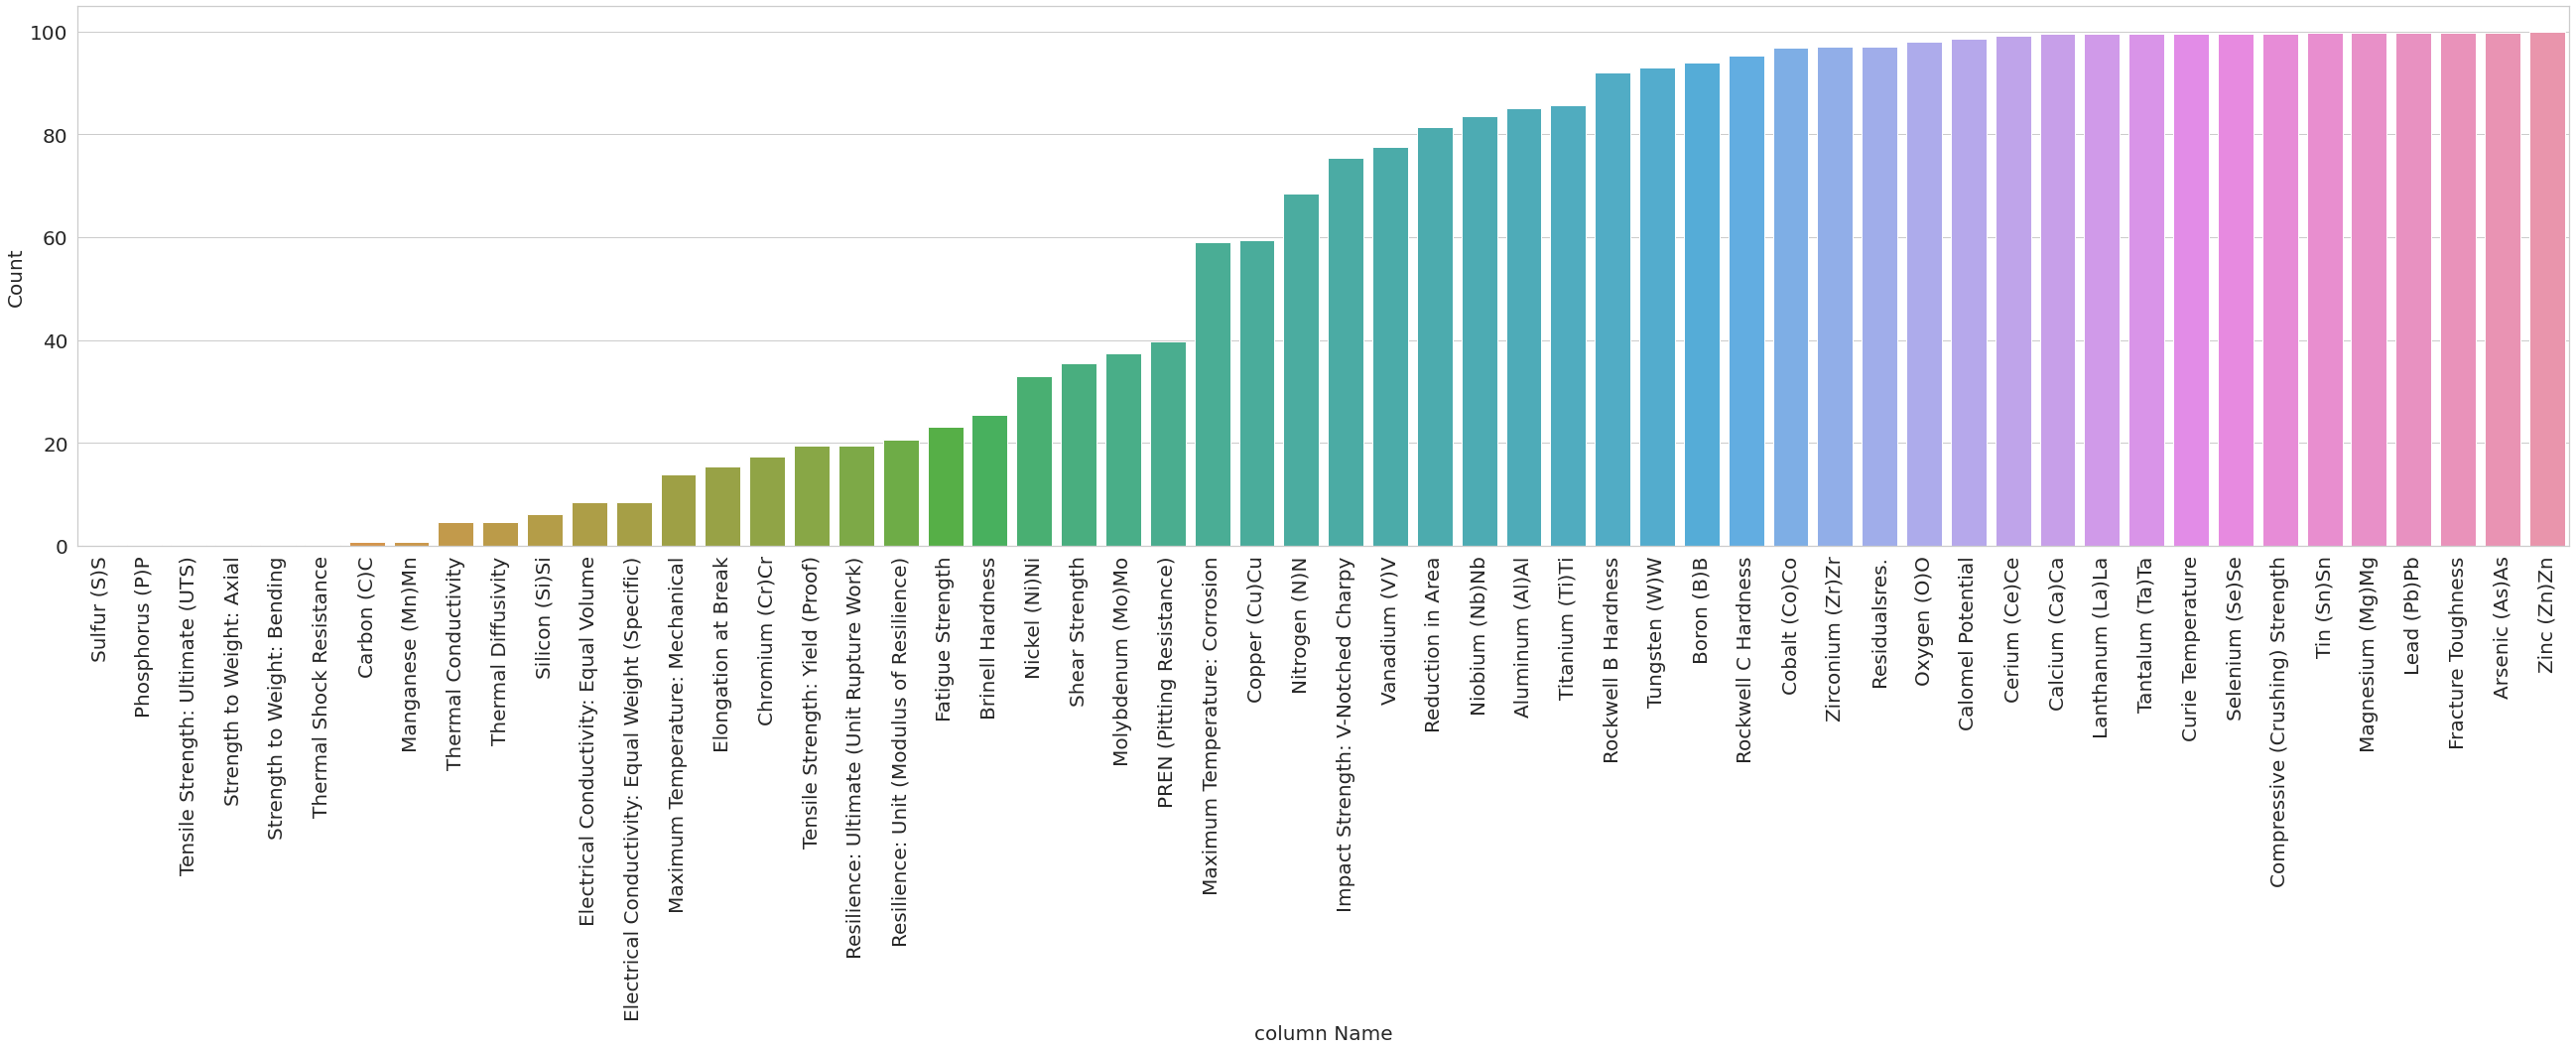

In [ ]:
#plot percentage of missing values for each columns
import seaborn as sns
plt.figure(figsize=(45,10))
sns.set(style="whitegrid", color_codes=True)
sns.barplot(x = missing_values.index, y = 'count', data=missing_values*100)
plt.xticks(fontsize=20, rotation = 90)
plt.yticks(fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.xlabel('column Name', fontsize=20)
plt.show()

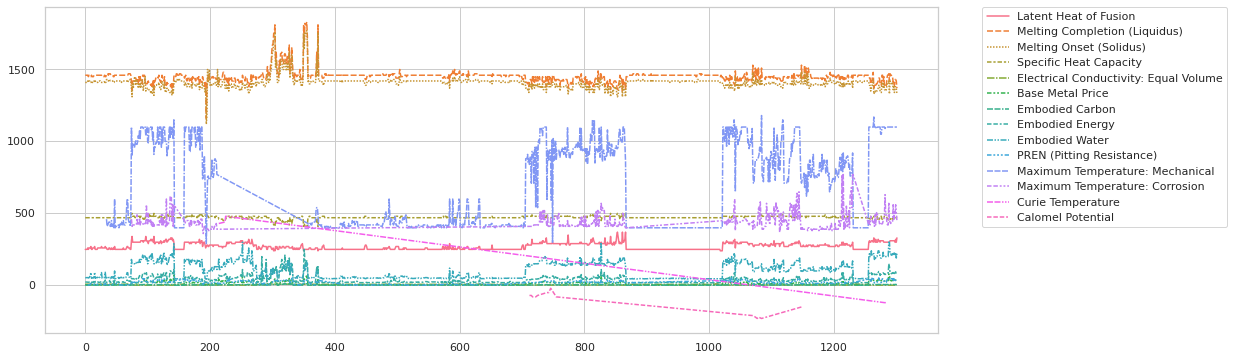

In [ ]:
# Set the width and height of the figure
plt.figure(figsize=(16,6))

# Line chart showing how FIFA rankings evolved over time 
sns.lineplot(data=df_train)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [ ]:
#coorelation heatmap
numeric_data = df_train.select_dtypes(include=[np.number])
categorical_data = df_train.select_dtypes(exclude=[np.number])

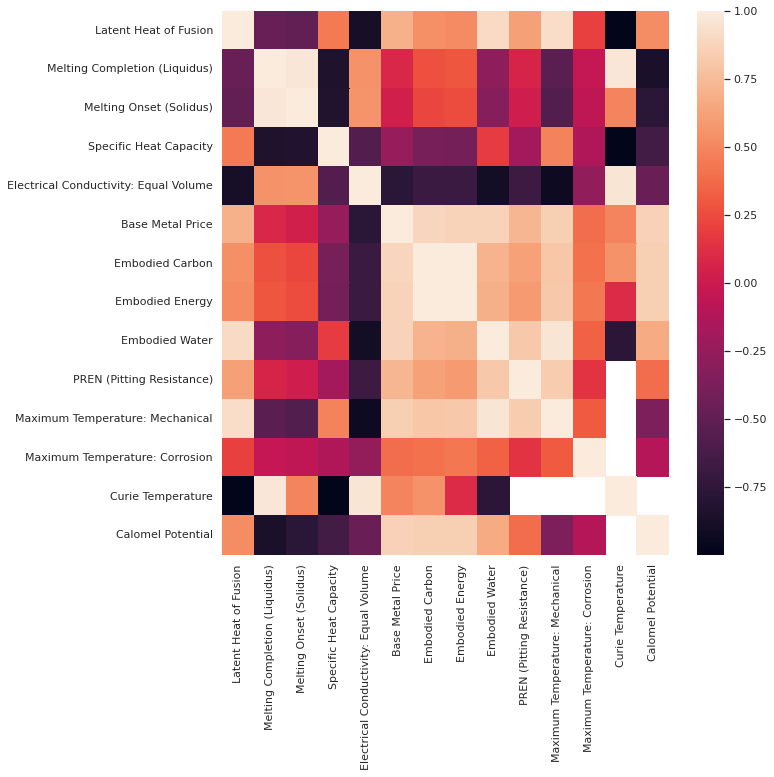

In [ ]:
corr = numeric_data.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr)

In [ ]:
print (corr['Latent Heat of Fusion'].sort_values(ascending=False)[:10]) #top 10 correlations
print (corr['Latent Heat of Fusion'].sort_values(ascending=False)[-5:]) #least 5 correlations

Latent Heat of Fusion              1.000000
Maximum Temperature: Mechanical    0.925009
Embodied Water                     0.907726
Base Metal Price                   0.703076
PREN (Pitting Resistance)          0.610926
Embodied Carbon                    0.538622
Calomel Potential                  0.528871
Embodied Energy                    0.519512
Specific Heat Capacity             0.441633
Maximum Temperature: Corrosion     0.205490
Name: Latent Heat of Fusion, dtype: float64
Maximum Temperature: Corrosion           0.205490
Melting Completion (Liquidus)           -0.462526
Melting Onset (Solidus)                 -0.493030
Electrical Conductivity: Equal Volume   -0.874949
Curie Temperature                       -0.998209
Name: Latent Heat of Fusion, dtype: float64


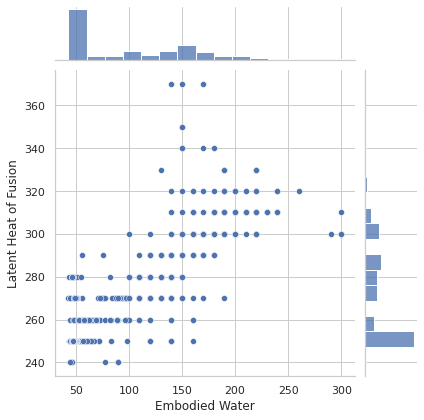

In [ ]:
sns.jointplot(x=df_train['Embodied Water'], y=df_train['Latent Heat of Fusion']) #exploring outliers

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either

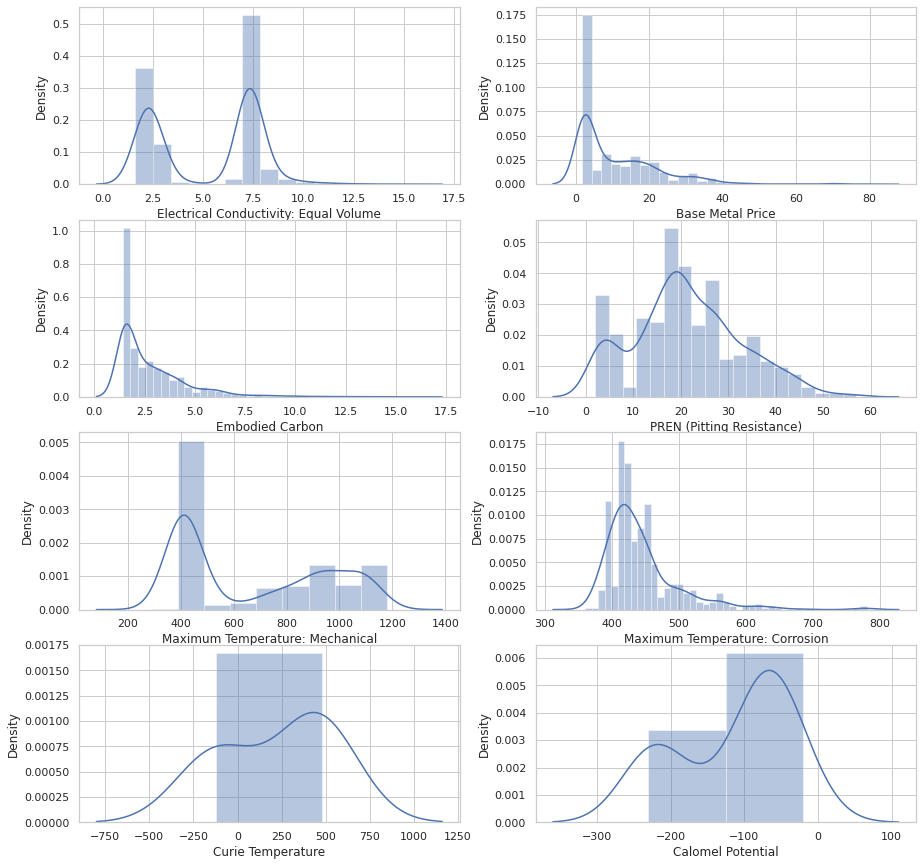

In [ ]:
import matplotlib.pyplot as plt
# Create the subplots
fig, axes = plt.subplots(4,2,figsize=(10,10))
fig.set_size_inches(15, 15)

n_cols=2
for i, column in enumerate(df_train.select_dtypes(include=[np.float])):
    sns.distplot(df_train[column],ax=axes[i//n_cols,i%n_cols])

In [ ]:
df_train.skew()
df_train.kurtosis()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


Latent Heat of Fusion                    -0.067478
Melting Completion (Liquidus)            29.572384
Melting Onset (Solidus)                  26.121147
Specific Heat Capacity                   14.487059
Electrical Conductivity: Equal Volume    -1.505216
Base Metal Price                          4.082109
Embodied Carbon                           7.426111
Embodied Energy                           9.309638
Embodied Water                           -0.729896
PREN (Pitting Resistance)                -0.204904
Maximum Temperature: Mechanical          -1.611770
Maximum Temperature: Corrosion            7.927793
Curie Temperature                        -3.307353
Calomel Potential                        -1.363421
dtype: float64

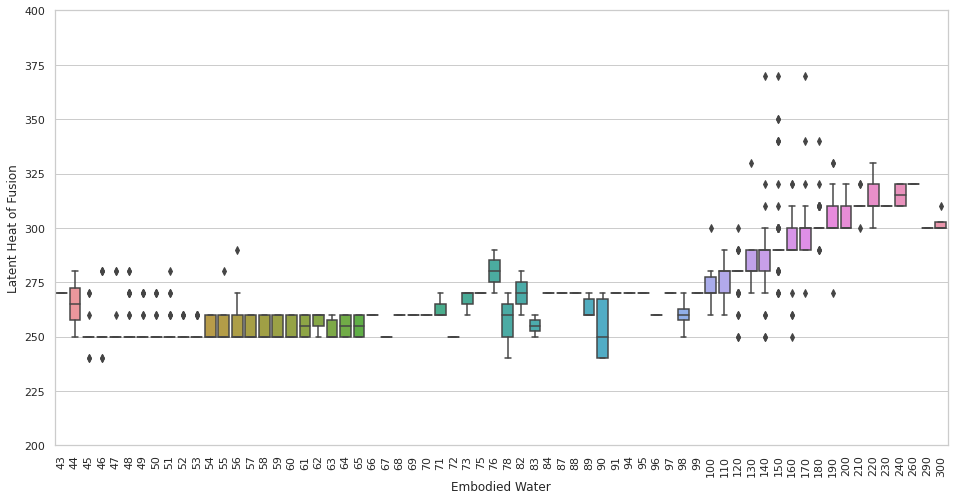

In [ ]:
var = 'Embodied Water'
data = pd.concat([df_train['Latent Heat of Fusion'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="Latent Heat of Fusion", data=data)
fig.axis(ymin=200, ymax=400);
plt.xticks(rotation=90);